In [15]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import numpy as np

In [17]:
df = pd.read_pickle("C:/ZIPcoding/dataset_final_jjin_0224.pkl")

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# NaN Í∞íÏùÑ Í∞Å Ïª¨ÎüºÏùò ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
cols = ['Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî', 'Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî']
df[cols] = df[cols].apply(lambda x: x.fillna(x.mean()))


# 1. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (PCAÎäî Î≥ÄÏàòÏùò Ïä§ÏºÄÏùº ÏòÅÌñ•ÏùÑ Î∞õÏúºÎØÄÎ°ú StandardScaler ÏÇ¨Ïö©)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî', 'Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî']])

# 2. PCA Ï†ÅÏö© (1Í∞úÏùò Ï£ºÏÑ±Î∂Ñ Ïú†ÏßÄ)
pca = PCA(n_components=1)
df['Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî'] = pca.fit_transform(scaled_data)

# 3. Í∏∞Ï°¥ Î≥ÄÏàò ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
df.drop(['Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî', 'Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî'], axis=1, inplace=True)

In [19]:
# ÏÇ¨Ïö©Ìï† Î™ÖÎ™©Ìòï Ïª¨Îüº ÏÑ†ÌÉù (Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ìï† Î≥ÄÏàòÎì§)
categorical_columns = ["ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä", "ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä"] 

# One-Hot Encoding (ÎçîÎØ∏ Î≥ÄÏàò Î≥ÄÌôò)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [20]:
df_encoded['ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1'] = df_encoded['ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1'].astype(int)
df_encoded['ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1'] = df_encoded['ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1'].astype(int)

In [13]:
#df_encoded.to_pickle("C:/ZIPcoding/final_encoded_df.pkl")

In [23]:
df_for_modeling = df_encoded.loc[(df['Í≥ÑÏïΩÏùº'] <= '2024-08-12')]

In [25]:
df_for_modeling

ÏûêÏπòÍµ¨ÏΩîÎìú  Î≤ïÏ†ïÎèôÏΩîÎìú        Ï†ÑÏ≤¥ÏΩîÎìú ÏûêÏπòÍµ¨Î™Ö Î≤ïÏ†ïÎèôÎ™Ö   ÏûêÏπòÍµ¨Î≤ïÏ†ïÎèô        Í≥ÑÏïΩÏùº         ÌèâÎãπÍ∞ÄÍ≤©  \
38234   11710  10700  1171010700  ÏÜ°ÌååÍµ¨  Í∞ÄÎùΩÎèô  ÏÜ°ÌååÍµ¨ Í∞ÄÎùΩÎèô 2024-08-12  5320.806583   
38235   11650  10800  1165010800  ÏÑúÏ¥àÍµ¨  ÏÑúÏ¥àÎèô  ÏÑúÏ¥àÍµ¨ ÏÑúÏ¥àÎèô 2024-08-12  6437.567483   
38236   11650  10800  1165010800  ÏÑúÏ¥àÍµ¨  ÏÑúÏ¥àÎèô  ÏÑúÏ¥àÍµ¨ ÏÑúÏ¥àÎèô 2024-08-12  6437.567483   
38237   11170  13100  1117013100  Ïö©ÏÇ∞Íµ¨  ÌïúÎÇ®Îèô  Ïö©ÏÇ∞Íµ¨ ÌïúÎÇ®Îèô 2024-08-12  6529.854650   
38238   11170  13100  1117013100  Ïö©ÏÇ∞Íµ¨  ÌïúÎÇ®Îèô  Ïö©ÏÇ∞Íµ¨ ÌïúÎÇ®Îèô 2024-08-12  6529.854650   
...       ...    ...         ...  ...  ...      ...        ...          ...   
515078  11740  10900  1174010900  Í∞ïÎèôÍµ¨  Ï≤úÌò∏Îèô  Í∞ïÎèôÍµ¨ Ï≤úÌò∏Îèô 2020-01-01  3258.722800   
515079  11440  11400  1144011400  ÎßàÌè¨Íµ¨  Ï∞ΩÏ†ÑÎèô  ÎßàÌè¨Íµ¨ Ï∞ΩÏ†ÑÎèô 2020-01-01  3301.553700   
515080  11350  10400  1135010400  ÎÖ∏ÏõêÍµ¨  ÌïòÍ≥ÑÎèô  ÎÖ∏ÏõêÍµ¨ ÌïòÍ≥ÑÎèô 2020-01-01  2544.444400   
515081  11530  10200  1153010200  Íµ¨Î°úÍµ¨  Íµ¨Î°úÎèô  Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô 2020-01-01  2217.640940   
515082  11530  10200  1153010200  Íµ¨Î°úÍµ¨  Íµ¨Î°úÎèô  Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô 2020-01-01  2217.640940   

          Ïã§Í±∞ÎûòÍ∞Ä                                           geometry  ...  \
38234   119833  POLYGON ((210866.983 444741.855, 210950.913 44...  ...   
38235   179583  POLYGON ((202095.233 444696.065, 202376.333 44...  ...   
38236   179583  POLYGON ((202095.233 444696.065, 202376.333 44...  ...   
38237   279750  POLYGON ((199456.074 448413.301, 199459.477 44...  ...   
38238   279750  POLYGON ((199456.074 448413.301, 199459.477 44...  ...   
...        ...                                                ...  ...   
515078   60000  POLYGON ((212438.023 449846.405, 212441.023 44...  ...   
515079   85000  POLYGON ((193686.353 449268.218, 193686.839 44...  ...   
515080   45800  POLYGON ((206778.261 460396.999, 206813.167 46...  ...   
515081   48700  POLYGON ((188204.903 443713.705, 188206.823 44...  ...   
515082   48700  POLYGON ((188204.903 443713.705, 188206.823 44...  ...   

       Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú  Îã®ÎèÖÎã§Í∞ÄÍµ¨  ÏïÑÌååÌä∏  Ïó∞Î¶ΩÎã§ÏÑ∏ÎåÄ  Ïò§ÌîºÏä§ÌÖî       Í±¥Ï∂ïÎÖÑÎèÑÌèâÍ∑†  Í±¥Ï∂ïÎÖÑÎèÑÏ§ëÏïôÍ∞í    Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®  \
38234       3.49      0    6      0     0  1966.073406   2005.0  279.235413   
38235       3.49      0    4      0     2  2002.218846   2005.0   79.337158   
38236       3.49      0    4      0     2  2002.218846   2005.0   79.337158   
38237       3.49      0    0      2     0  2002.773196   2004.0   12.491157   
38238       3.49      0    0      2     0  2002.773196   2004.0   12.491157   
...          ...    ...  ...    ...   ...          ...      ...         ...   
515078      2.42      0    1      0     0  2000.409442   2015.0  146.339179   
515079      2.42      0    1      0     0  2005.379200   2005.0    7.191645   
515080      2.42      0    1      0     0  1991.980269   1989.0    5.980557   
515081      2.42      0    4      1     0  2002.491183   2003.0   24.046963   
515082      2.42      0    4      1     0  2002.491183   2003.0   24.046963   

        ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1  ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1  
38234             0        0  
38235             1        0  
38236             1        0  
38237             0        0  
38238             0        0  
...             ...      ...  
515078            0        1  
515079            0        1  
515080            0        0  
515081            0        0  
515082            0        0  

[476849 rows x 64 columns]

In [148]:
df_for_modeling.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 476849 entries, 38234 to 515082
Data columns (total 64 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ÏûêÏπòÍµ¨ÏΩîÎìú          476849 non-null  int32         
 1   Î≤ïÏ†ïÎèôÏΩîÎìú          476849 non-null  int32         
 2   Ï†ÑÏ≤¥ÏΩîÎìú           476849 non-null  object        
 3   ÏûêÏπòÍµ¨Î™Ö           476849 non-null  object        
 4   Î≤ïÏ†ïÎèôÎ™Ö           476849 non-null  object        
 5   ÏûêÏπòÍµ¨Î≤ïÏ†ïÎèô         476849 non-null  object        
 6   Í≥ÑÏïΩÏùº            476849 non-null  datetime64[ns]
 7   ÌèâÎãπÍ∞ÄÍ≤©           476849 non-null  float64       
 8   Ïã§Í±∞ÎûòÍ∞Ä           476849 non-null  int32         
 9   geometry       476849 non-null  geometry      
 10  Ìè¨Ìï®ÏßÄÌïòÏ≤†Ïó≠         476849 non-null  object        
 11  ÌôòÏäπÏó≠Í∞úÏàò          476849 non-null  int64         
 12  ÏùºÎ∞òÏó≠Í∞úÏàò          476849 non-null  int64  

In [150]:
df_encoded.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 64 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ÏûêÏπòÍµ¨ÏΩîÎìú          515083 non-null  int32         
 1   Î≤ïÏ†ïÎèôÏΩîÎìú          515083 non-null  int32         
 2   Ï†ÑÏ≤¥ÏΩîÎìú           515083 non-null  object        
 3   ÏûêÏπòÍµ¨Î™Ö           515083 non-null  object        
 4   Î≤ïÏ†ïÎèôÎ™Ö           515083 non-null  object        
 5   ÏûêÏπòÍµ¨Î≤ïÏ†ïÎèô         515083 non-null  object        
 6   Í≥ÑÏïΩÏùº            515083 non-null  datetime64[ns]
 7   ÌèâÎãπÍ∞ÄÍ≤©           515083 non-null  float64       
 8   Ïã§Í±∞ÎûòÍ∞Ä           515083 non-null  int32         
 9   geometry       515083 non-null  geometry      
 10  Ìè¨Ìï®ÏßÄÌïòÏ≤†Ïó≠         515083 non-null  object        
 11  ÌôòÏäπÏó≠Í∞úÏàò          515083 non-null  int64         
 12  ÏùºÎ∞òÏó≠Í∞úÏàò          515083 non-null  int64 

In [27]:
# Ïª¨Îüº ÏÑ†ÌÉù PCA Ï†Ñ
numeric_col = ['ÌèâÎãπÍ∞ÄÍ≤©','Ïã§Í±∞ÎûòÍ∞Ä','ÌôòÏäπÏó≠Í∞úÏàò','ÏùºÎ∞òÏó≠Í∞úÏàò', '1Ìò∏ÏÑ†Í∞úÏàò', '2Ìò∏ÏÑ†Í∞úÏàò', '3Ìò∏ÏÑ†Í∞úÏàò','4Ìò∏ÏÑ†Í∞úÏàò', '5Ìò∏ÏÑ†Í∞úÏàò', '6Ìò∏ÏÑ†Í∞úÏàò',
                 '7Ìò∏ÏÑ†Í∞úÏàò','8Ìò∏ÏÑ†Í∞úÏàò','9Ìò∏ÏÑ†Í∞úÏàò','Í≤ΩÏùòÏ§ëÏïôÏÑ†Í∞úÏàò','Í≤ΩÏ∂òÏÑ†Í∞úÏàò','Í≥µÌï≠Ï≤†ÎèÑÍ∞úÏàò','ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò','Ïã†Î∂ÑÎãπÏÑ†Í∞úÏàò','Ïö∞Ïù¥Ïã†ÏÑ§ÏÑ†Í∞úÏàò',
                 'Ïã†Î¶ºÏÑ†Í∞úÏàò','GTX-AÍ∞úÏàò','ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî','Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî','ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî','ÌèâÎãπÍ∞ÄÍ≤©Ï§ëÏïôÍ∞í_3Í∞úÏõî','Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî',
                 'Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî', 'Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî','ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî','ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî','ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî',
                 'Ï∏µÌèâÍ∑†_3Í∞úÏõî','Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî','Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî','Ï∏µÌèâÍ∑†_6Í∞úÏõî','Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî','Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî','ÏàòÎèÑÍ∂åÏïÑÌååÌä∏ÏûÖÏ£ºÎ¨ºÎüâ','ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ',
                 'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú', 'Îã®ÎèÖÎã§Í∞ÄÍµ¨', 'ÏïÑÌååÌä∏', 'Ïó∞Î¶ΩÎã§ÏÑ∏ÎåÄ', 'Ïò§ÌîºÏä§ÌÖî', 'Í±¥Ï∂ïÎÖÑÎèÑÌèâÍ∑†', 'Í±¥Ï∂ïÎÖÑÎèÑÏ§ëÏïôÍ∞í', 'Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®']

In [197]:
# Ïª¨Îüº ÏÑ†ÌÉù PCA ÌõÑ
numeric_col = ['ÌèâÎãπÍ∞ÄÍ≤©','Ïã§Í±∞ÎûòÍ∞Ä','ÌôòÏäπÏó≠Í∞úÏàò','ÏùºÎ∞òÏó≠Í∞úÏàò', '1Ìò∏ÏÑ†Í∞úÏàò', '2Ìò∏ÏÑ†Í∞úÏàò', '3Ìò∏ÏÑ†Í∞úÏàò','4Ìò∏ÏÑ†Í∞úÏàò', '5Ìò∏ÏÑ†Í∞úÏàò', '6Ìò∏ÏÑ†Í∞úÏàò',
                 '7Ìò∏ÏÑ†Í∞úÏàò','8Ìò∏ÏÑ†Í∞úÏàò','9Ìò∏ÏÑ†Í∞úÏàò','Í≤ΩÏùòÏ§ëÏïôÏÑ†Í∞úÏàò','Í≤ΩÏ∂òÏÑ†Í∞úÏàò','Í≥µÌï≠Ï≤†ÎèÑÍ∞úÏàò','ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò','Ïã†Î∂ÑÎãπÏÑ†Í∞úÏàò','Ïö∞Ïù¥Ïã†ÏÑ§ÏÑ†Í∞úÏàò',
                 'Ïã†Î¶ºÏÑ†Í∞úÏàò','GTX-AÍ∞úÏàò','Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî','ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî','ÌèâÎãπÍ∞ÄÍ≤©_PCA_3Í∞úÏõî','Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî',
                 'Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî','ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî','ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî','ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî',
                 'Ï∏µÌèâÍ∑†_3Í∞úÏõî','Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî','Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî','Ï∏µÌèâÍ∑†_6Í∞úÏõî','Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî','Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî','ÏàòÎèÑÍ∂åÏïÑÌååÌä∏ÏûÖÏ£ºÎ¨ºÎüâ','ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ',
                 'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú', 'Îã®ÎèÖÎã§Í∞ÄÍµ¨', 'ÏïÑÌååÌä∏', 'Ïó∞Î¶ΩÎã§ÏÑ∏ÎåÄ', 'Ïò§ÌîºÏä§ÌÖî', 'Í±¥Ï∂ïÎÖÑÎèÑÌèâÍ∑†', 'Í±¥Ï∂ïÎÖÑÎèÑÏ§ëÏïôÍ∞í', 'Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®']

In [29]:
encoded_col = ['ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1', 'ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1']

# Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∂ÑÏÑùÌï† Ïª¨Îüº ÏÑ†ÌÉù
selected_df = df_encoded[numeric_col + encoded_col]

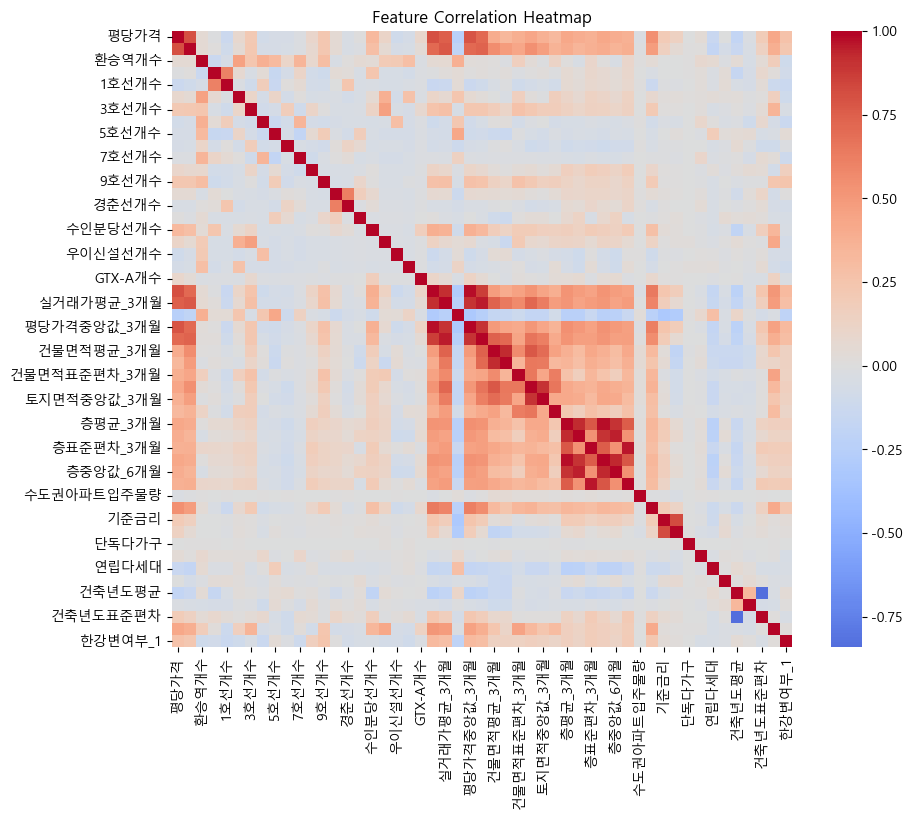

In [17]:

# Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∂ÑÏÑùÌï† Ïª¨Îüº ÏÑ†ÌÉù
selected_df = df_encoded[numeric_col + encoded_col]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation_matrix = selected_df.corr()

# 'ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ' ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∂îÏ∂ú
target_correlation = correlation_matrix["ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ"].sort_values(ascending=False)

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò (Top 10)
ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ      1.000000
ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî     0.643476
ÌèâÎãπÍ∞ÄÍ≤©Ï§ëÏïôÍ∞í_3Í∞úÏõî    0.622148
Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî     0.592088
Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî    0.551730
ÌèâÎãπÍ∞ÄÍ≤©           0.541161
Ïã§Í±∞ÎûòÍ∞Ä           0.477476
ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1    0.403370
ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî     0.361015
Ï∏µÌèâÍ∑†_3Í∞úÏõî        0.343931
Name: ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ, dtype: float64

6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ Î≥ÄÏàò (Bottom 10)
6Ìò∏ÏÑ†Í∞úÏàò       -0.049157
Ïò§ÌîºÏä§ÌÖî        -0.050437
5Ìò∏ÏÑ†Í∞úÏàò       -0.052949
Ïã†Î¶ºÏÑ†Í∞úÏàò       -0.066178
4Ìò∏ÏÑ†Í∞úÏàò       -0.079192
Ïö∞Ïù¥Ïã†ÏÑ§ÏÑ†Í∞úÏàò     -0.093523
Ïó∞Î¶ΩÎã§ÏÑ∏ÎåÄ       -0.117348
Í±¥Ï∂ïÎÖÑÎèÑÌèâÍ∑†      -0.122921
1Ìò∏ÏÑ†Í∞úÏàò       -0.124423
ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî   -0.223498
Name: ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ, dtype: float64


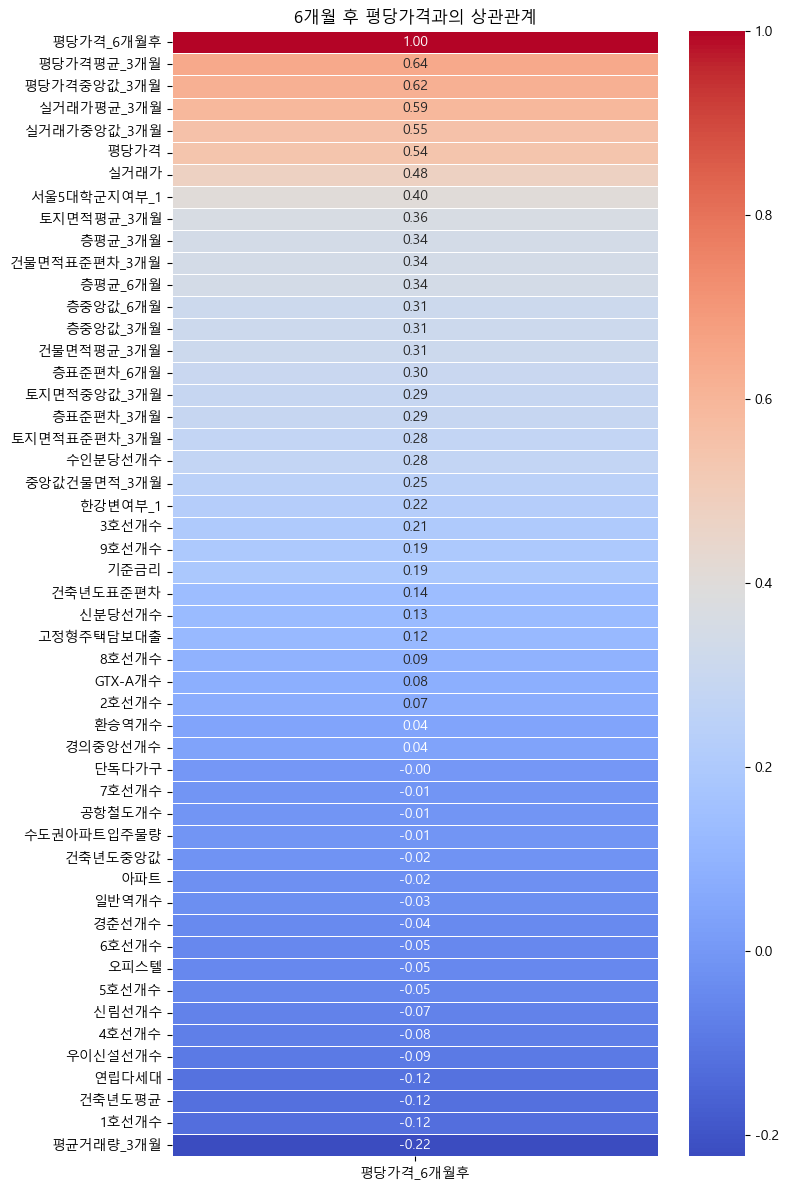

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàò Ìè¨Ìï®ÌïòÏó¨ ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞
correlation_with_price = selected_df.corr()["ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ"].sort_values(ascending=False)

# ÏÉÅÏúÑ 10Í∞ú & ÌïòÏúÑ 10Í∞ú Î≥ÄÏàò Ï∂úÎ†•
top_10_corr = correlation_with_price.head(10)
bottom_10_corr = correlation_with_price.tail(10)

# ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º Ï∂úÎ†•
print("6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò (Top 10)")
print(top_10_corr)
print("\n6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ Î≥ÄÏàò (Bottom 10)")
print(bottom_10_corr)

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî (ÌûàÌä∏Îßµ)
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.tight_layout()
plt.savefig("C:/ZIPcoding/plots/ÏÉÅÍ¥ÄÍ≥ÑÏàò_PCAÏ†Ñ.png", dpi=500)
plt.show()



In [25]:
correlation_with_price

ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ       1.000000
ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî      0.646839
ÌèâÎãπÍ∞ÄÍ≤©Ï§ëÏïôÍ∞í_3Í∞úÏõî     0.625402
Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî      0.595352
Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.554987
ÌèâÎãπÍ∞ÄÍ≤©            0.543389
Ïã§Í±∞ÎûòÍ∞Ä            0.479644
ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1     0.405040
ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.362410
Ï∏µÌèâÍ∑†_3Í∞úÏõî         0.345571
Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    0.344342
Ï∏µÌèâÍ∑†_6Í∞úÏõî         0.344178
Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî        0.316181
Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî        0.315773
Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.314506
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî       0.299810
ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.293767
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî       0.293025
ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò         0.276693
ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    0.276422
Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî     0.250017
ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1         0.223382
3Ìò∏ÏÑ†Í∞úÏàò           0.205210
9Ìò∏ÏÑ†Í∞úÏàò           0.195396
Í∏∞Ï§ÄÍ∏àÎ¶¨            0.190083
Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®        0

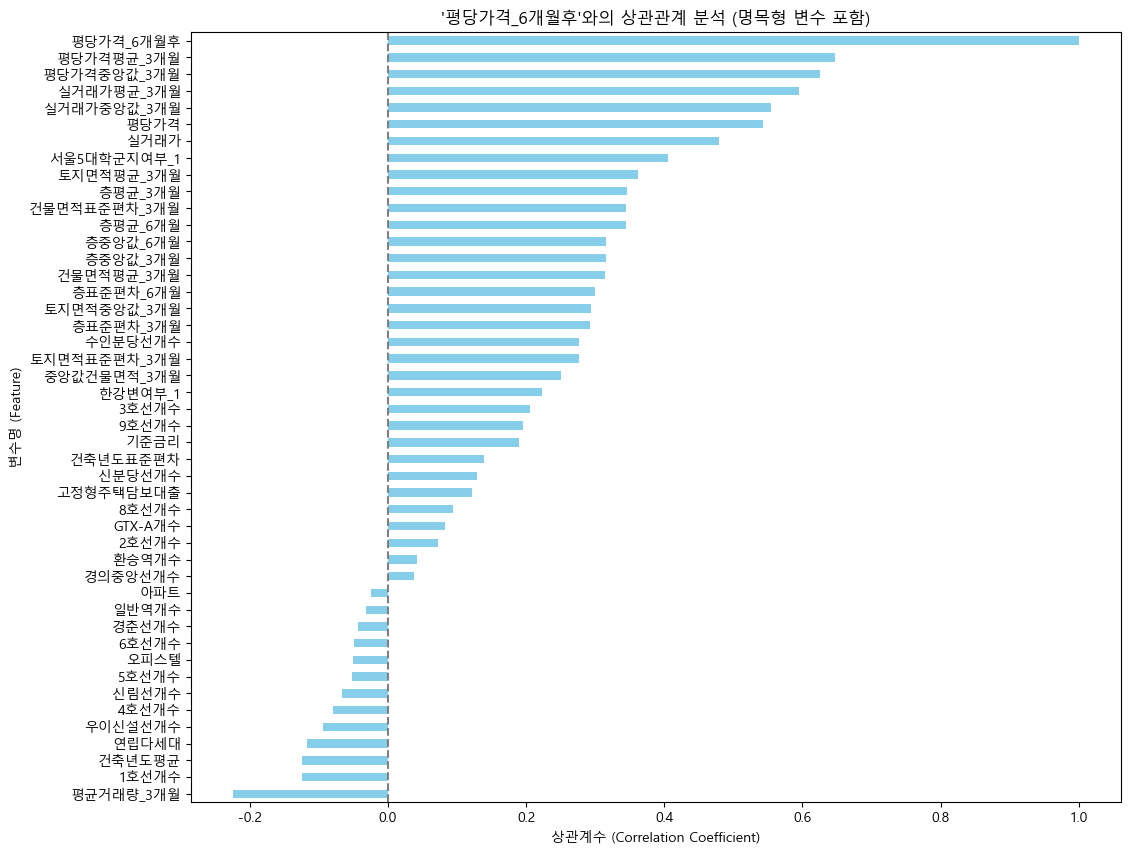

ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ       1.000000
ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî      0.646839
ÌèâÎãπÍ∞ÄÍ≤©Ï§ëÏïôÍ∞í_3Í∞úÏõî     0.625402
Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî      0.595352
Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.554987
ÌèâÎãπÍ∞ÄÍ≤©            0.543389
Ïã§Í±∞ÎûòÍ∞Ä            0.479644
ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1     0.405040
ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.362410
Ï∏µÌèâÍ∑†_3Í∞úÏõî         0.345571
Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    0.344342
Ï∏µÌèâÍ∑†_6Í∞úÏõî         0.344178
Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî        0.316181
Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî        0.315773
Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.314506
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî       0.299810
ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.293767
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî       0.293025
ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò         0.276693
ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    0.276422
Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî     0.250017
ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1         0.223382
3Ìò∏ÏÑ†Í∞úÏàò           0.205210
9Ìò∏ÏÑ†Í∞úÏàò           0.195396
Í∏∞Ï§ÄÍ∏àÎ¶¨            0.190083
Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®        0

In [27]:

# ÌäπÏ†ï Î≥ÄÏàò('ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ')ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ (0.02 Ïù¥ÏÉÅ ÎòêÎäî -0.02 Ïù¥Ìïò)
significant_correlation = target_correlation[(target_correlation >= 0.02) | (target_correlation <= -0.02)]

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§ÏùÑ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
significant_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò (Correlation Coefficient)")
plt.ylabel("Î≥ÄÏàòÎ™Ö (Feature)")
plt.title("'ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ'ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (Î™ÖÎ™©Ìòï Î≥ÄÏàò Ìè¨Ìï®)")
plt.show()

# ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò Ï∂úÎ†•
significant_correlation


# PCA Ïù¥ÌõÑ

6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò (Top 10)
ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ       1.000000
ÌèâÎãπÍ∞ÄÍ≤©_PCA_3Í∞úÏõî    0.635881
Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî      0.592088
Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.551730
ÌèâÎãπÍ∞ÄÍ≤©            0.541161
Ïã§Í±∞ÎûòÍ∞Ä            0.477476
ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1     0.403370
ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.361015
Ï∏µÌèâÍ∑†_3Í∞úÏõî         0.343931
Ï∏µÌèâÍ∑†_6Í∞úÏõî         0.342574
Name: ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ, dtype: float64

6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ Î≥ÄÏàò (Bottom 10)
6Ìò∏ÏÑ†Í∞úÏàò       -0.049157
Ïò§ÌîºÏä§ÌÖî        -0.050437
5Ìò∏ÏÑ†Í∞úÏàò       -0.052949
Ïã†Î¶ºÏÑ†Í∞úÏàò       -0.066178
4Ìò∏ÏÑ†Í∞úÏàò       -0.079192
Ïö∞Ïù¥Ïã†ÏÑ§ÏÑ†Í∞úÏàò     -0.093523
Ïó∞Î¶ΩÎã§ÏÑ∏ÎåÄ       -0.117348
Í±¥Ï∂ïÎÖÑÎèÑÌèâÍ∑†      -0.122921
1Ìò∏ÏÑ†Í∞úÏàò       -0.124423
ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî   -0.223498
Name: ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ, dtype: float64


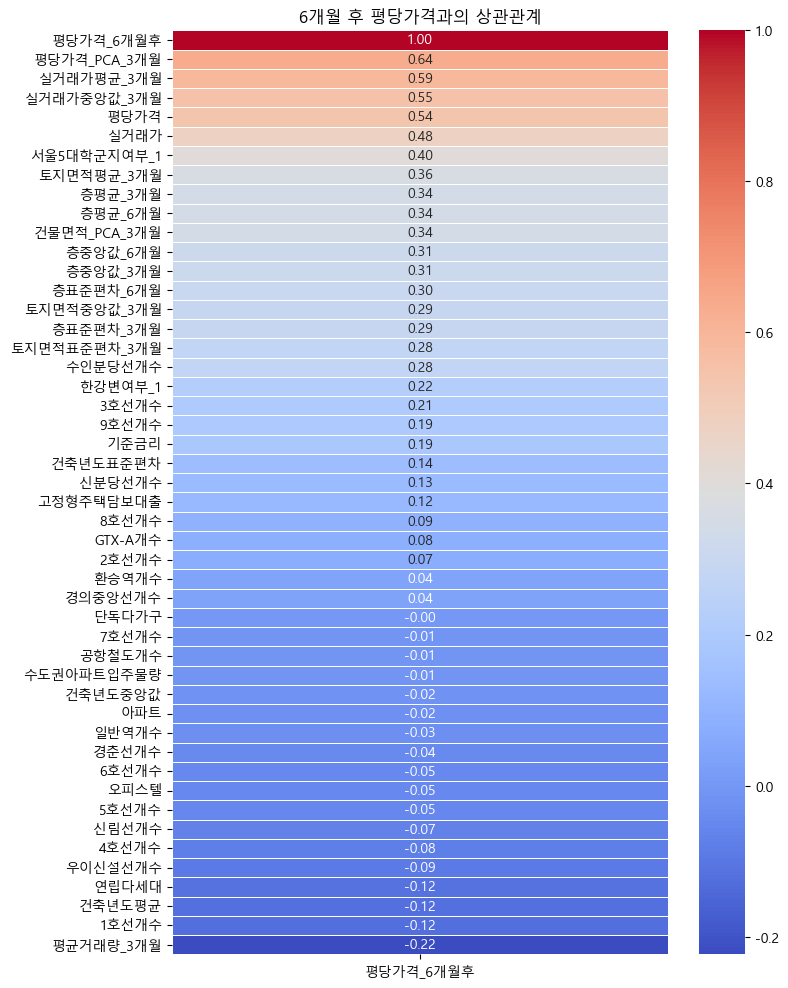

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt


# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàò Ìè¨Ìï®ÌïòÏó¨ ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞
correlation_with_price = selected_df.corr()["ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ"].sort_values(ascending=False)

# ÏÉÅÏúÑ 10Í∞ú & ÌïòÏúÑ 10Í∞ú Î≥ÄÏàò Ï∂úÎ†•
top_10_corr = correlation_with_price.head(10)
bottom_10_corr = correlation_with_price.tail(10)

# ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º Ï∂úÎ†•
print("6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò (Top 10)")
print(top_10_corr)
print("\n6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ Î≥ÄÏàò (Bottom 10)")
print(bottom_10_corr)

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî (ÌûàÌä∏Îßµ)
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("6Í∞úÏõî ÌõÑ ÌèâÎãπÍ∞ÄÍ≤©Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()



In [205]:
correlation_with_price

ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ       1.000000
ÌèâÎãπÍ∞ÄÍ≤©_PCA_3Í∞úÏõî    0.635881
Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî      0.592088
Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.551730
ÌèâÎãπÍ∞ÄÍ≤©            0.541161
Ïã§Í±∞ÎûòÍ∞Ä            0.477476
ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1     0.403370
ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.361015
Ï∏µÌèâÍ∑†_3Í∞úÏõî         0.343931
Ï∏µÌèâÍ∑†_6Í∞úÏõî         0.342574
Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî    0.340712
Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî        0.314599
Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî        0.314295
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî       0.298644
ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.292556
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî       0.291755
ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    0.275803
ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò         0.275255
ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1         0.223002
3Ìò∏ÏÑ†Í∞úÏàò           0.205040
9Ìò∏ÏÑ†Í∞úÏàò           0.194299
Í∏∞Ï§ÄÍ∏àÎ¶¨            0.187593
Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®        0.137411
Ïã†Î∂ÑÎãπÏÑ†Í∞úÏàò          0.128858
Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú       0.121544
8Ìò∏ÏÑ†Í∞úÏàò           0.094201
GTX-AÍ∞úÏàò       

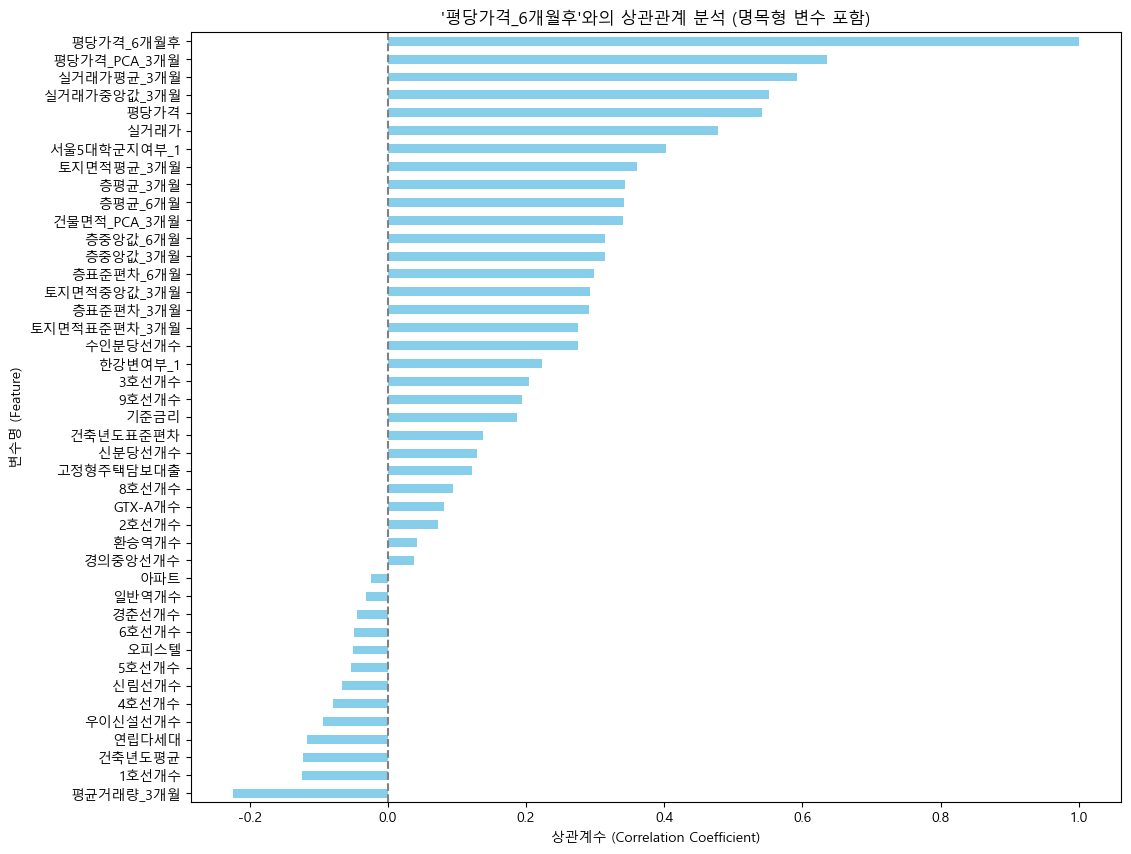

ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ       1.000000
ÌèâÎãπÍ∞ÄÍ≤©_PCA_3Í∞úÏõî    0.635881
Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî      0.592088
Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.551730
ÌèâÎãπÍ∞ÄÍ≤©            0.541161
Ïã§Í±∞ÎûòÍ∞Ä            0.477476
ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1     0.403370
ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî      0.361015
Ï∏µÌèâÍ∑†_3Í∞úÏõî         0.343931
Ï∏µÌèâÍ∑†_6Í∞úÏõî         0.342574
Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî    0.340712
Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî        0.314599
Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî        0.314295
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî       0.298644
ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî     0.292556
Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî       0.291755
ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    0.275803
ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò         0.275255
ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1         0.223002
3Ìò∏ÏÑ†Í∞úÏàò           0.205040
9Ìò∏ÏÑ†Í∞úÏàò           0.194299
Í∏∞Ï§ÄÍ∏àÎ¶¨            0.187593
Í±¥Ï∂ïÎÖÑÎèÑÌëúÏ§ÄÌé∏Ï∞®        0.137411
Ïã†Î∂ÑÎãπÏÑ†Í∞úÏàò          0.128858
Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú       0.121544
8Ìò∏ÏÑ†Í∞úÏàò           0.094201
GTX-AÍ∞úÏàò       

In [207]:

# ÌäπÏ†ï Î≥ÄÏàò('ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ')ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ (0.02 Ïù¥ÏÉÅ ÎòêÎäî -0.02 Ïù¥Ìïò)
significant_correlation = target_correlation[(target_correlation >= 0.02) | (target_correlation <= -0.02)]

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§ÏùÑ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
significant_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò (Correlation Coefficient)")
plt.ylabel("Î≥ÄÏàòÎ™Ö (Feature)")
plt.title("'ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ'ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (Î™ÖÎ™©Ìòï Î≥ÄÏàò Ìè¨Ìï®)")
plt.show()

# ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò Ï∂úÎ†•
significant_correlation


In [43]:
# Ï†àÎåìÍ∞í 0.2 Ïù¥ÏÉÅ
significant_columns = [
    "ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî", "ÌèâÎãπÍ∞ÄÍ≤©Ï§ëÏïôÍ∞í_3Í∞úÏõî", "Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî", "Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî",  
    "ÌèâÎãπÍ∞ÄÍ≤©", "Ïã§Í±∞ÎûòÍ∞Ä", "ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1", "ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî", "Ï∏µÌèâÍ∑†_3Í∞úÏõî", "Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî",  
    "Ï∏µÌèâÍ∑†_6Í∞úÏõî", "Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî", "Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî", "Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî", "Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî", "ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî",  
    "Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî", "ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò", "ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî", "Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî", "ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1",  
    "3Ìò∏ÏÑ†Í∞úÏàò", "ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî"
]



In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF Í≥ÑÏÇ∞Ìï† Îç∞Ïù¥ÌÑ∞ÏÖã (NaN Ï†úÍ±∞ & float Î≥ÄÌôò)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:")
print(vif_data)


üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:
         Feature         VIF
10       Ï∏µÌèâÍ∑†_6Í∞úÏõî  678.728309
8        Ï∏µÌèâÍ∑†_3Í∞úÏõî  580.387207
14     Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî  279.792773
13    Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî  238.326454
16     Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî  236.841320
0     ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî  230.160558
7     ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî  200.136734
1    ÌèâÎãπÍ∞ÄÍ≤©Ï§ëÏïôÍ∞í_3Í∞úÏõî  186.227005
11      Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî  185.941461
12      Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî  155.012646
19   Ï§ëÏïôÍ∞íÍ±¥Î¨ºÎ©¥Ï†Å_3Í∞úÏõî  143.102108
15   ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî  123.536475
2     Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî   89.978581
3    Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî   60.126186
9   Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî   28.674178
4           ÌèâÎãπÍ∞ÄÍ≤©   20.417640
5           Ïã§Í±∞ÎûòÍ∞Ä    8.673908
18  ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    8.586852
22     ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî    2.138998
6    ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1    1.990022
20       ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1    1.485087
17       ÏàòÏù∏Î∂

In [46]:
# VIFÍ∞í 10 Ïù¥ÏÉÅÏù∏ Ïª¨ÎüºÎì§ Ï†úÍ±∞ & Ï∏µ, Í±¥Î¨ºÎ©¥Ï†Å, ÌèâÎãπÍ∞ÄÍ≤© Ïª¨Îüº ÌïòÎÇòÎßå ÎÇ®Í∏∞Í∏∞
significant_columns = ["Ïã§Í±∞ÎûòÍ∞Ä", "ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî", "ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1", "ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî",
                        "3Ìò∏ÏÑ†Í∞úÏàò", "ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1", "ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò", "Ï∏µÌèâÍ∑†_6Í∞úÏõî", "Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî"]


# VIF Í≥ÑÏÇ∞Ìï† Îç∞Ïù¥ÌÑ∞ÏÖã (NaN Ï†úÍ±∞ & float Î≥ÄÌôò)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:")
print(vif_data)


üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:
        Feature        VIF
8  Í±¥Î¨ºÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî  12.146786
7       Ï∏µÌèâÍ∑†_6Í∞úÏõî   7.253503
1  ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî   5.389567
0          Ïã§Í±∞ÎûòÍ∞Ä   3.453284
3     ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî   1.799550
2   ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1   1.668232
5       ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1   1.352664
4         3Ìò∏ÏÑ†Í∞úÏàò   1.275777
6       ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò   1.233097


-> pca

### PCA ÌõÑ

In [214]:
# Ï†àÎåìÍ∞í 0.2 Ïù¥ÏÉÅ
significant_columns = [
    'ÌèâÎãπÍ∞ÄÍ≤©_PCA_3Í∞úÏõî', 'Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî', 'Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî', 
    'Ïã§Í±∞ÎûòÍ∞Ä', 'ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1', 'ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'Ï∏µÌèâÍ∑†_3Í∞úÏõî', 
    'Ï∏µÌèâÍ∑†_6Í∞úÏõî', 'Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî', 'Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî', 'Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî', 
    'Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî', 'ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî', 'Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî', 'ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî', 
    'ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò', 'ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1', '3Ìò∏ÏÑ†Í∞úÏàò', 'ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî'
]


In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF Í≥ÑÏÇ∞Ìï† Îç∞Ïù¥ÌÑ∞ÏÖã (NaN Ï†úÍ±∞ & float Î≥ÄÌôò)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:")
print(vif_data)


üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:
         Feature         VIF
7        Ï∏µÌèâÍ∑†_6Í∞úÏõî  679.229467
6        Ï∏µÌèâÍ∑†_3Í∞úÏõî  581.124834
11     Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî  278.640397
13     Ï∏µÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî  236.777922
9       Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî  185.910352
5     ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî  170.062384
10      Ï∏µÏ§ëÏïôÍ∞í_3Í∞úÏõî  155.100520
12   ÌÜ†ÏßÄÎ©¥Ï†ÅÏ§ëÏïôÍ∞í_3Í∞úÏõî  119.381595
1     Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî   78.199077
2    Ïã§Í±∞ÎûòÍ∞ÄÏ§ëÏïôÍ∞í_3Í∞úÏõî   36.269762
0   ÌèâÎãπÍ∞ÄÍ≤©_PCA_3Í∞úÏõî   10.541558
14  ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî    8.243742
3           Ïã§Í±∞ÎûòÍ∞Ä    5.574302
18     ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî    2.331023
8   Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî    2.320216
4    ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1    1.893036
16       ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1    1.475027
15       ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò    1.313016
17         3Ìò∏ÏÑ†Í∞úÏàò    1.287169


In [222]:
# VIFÍ∞í 10 Ïù¥ÏÉÅÏù∏ Ïª¨ÎüºÎì§ Ï†úÍ±∞ & Ï∏µ ÌïòÎÇòÎßå ÎÇ®Í∏∞Í∏∞
significant_columns = [
    'ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî', 'Ïã§Í±∞ÎûòÍ∞Ä', 'ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî',
    'Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî', 'ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1', 'ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1', 'ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò', '3Ìò∏ÏÑ†Í∞úÏàò', "Ï∏µÌèâÍ∑†_6Í∞úÏõî"
]

# VIF Í≥ÑÏÇ∞Ìï† Îç∞Ïù¥ÌÑ∞ÏÖã (NaN Ï†úÍ±∞ & float Î≥ÄÌôò)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:")
print(vif_data)


üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(VIF) Î∂ÑÏÑù Í≤∞Í≥º:
        Feature       VIF
8       Ï∏µÌèâÍ∑†_6Í∞úÏõî  4.995894
0  ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî  3.926417
1          Ïã§Í±∞ÎûòÍ∞Ä  3.871868
2     ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî  1.814030
4   ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1  1.623716
3  Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî  1.499413
5       ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1  1.347939
7         3Ìò∏ÏÑ†Í∞úÏàò  1.275782
6       ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò  1.230877


In [ ]:
### 

In [83]:
import statsmodels.api as sm
import numpy as np

# ÎèÖÎ¶ΩÎ≥ÄÏàò (ÏÑ§Î™ÖÎ≥ÄÏàò)ÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò (Î™©ÌëúÎ≥ÄÏàò) ÏÑ§Ï†ï
X = selected_df.drop(columns=['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ'])  # Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ ÏÇ¨Ïö©
y = selected_df['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ']  # Ï¢ÖÏÜçÎ≥ÄÏàò

# Í≤∞Ï∏°Ïπò(NaN) Î∞è Î¨¥ÌïúÎåÄ(inf) Í∞í Ï≤òÎ¶¨
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf Í∞íÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò
X.dropna(inplace=True)  # NaN Í∞í Ï†úÍ±∞
y = y.loc[X.index]  # XÏùò Î≥ÄÍ≤ΩÎêú Ïù∏Îç±Ïä§Ïóê ÎßûÍ≤å yÎèÑ Ï°∞Ï†ï

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (Ï†àÌé∏ Ìè¨Ìï®)
X = sm.add_constant(X)

# OLS Î™®Îç∏ ÏÉùÏÑ± Î∞è Ï†ÅÌï© (fit)
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     7600.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:47:50   Log-Likelihood:            -4.0868e+06
No. Observations:              474086   AIC:                         8.174e+06
Df Residuals:                  474035   BIC:                         8.174e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -370.8683    239.749

In [85]:

# ÏÑ†ÌÉùÎêú Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò Î™©Î°ù
selected_features = [
    "ÌèâÎãπÍ∞ÄÍ≤©", "ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî", "Ïã§Í±∞ÎûòÍ∞ÄÌèâÍ∑†_3Í∞úÏõî",
    "ÌôòÏäπÏó≠Í∞úÏàò", "ÏùºÎ∞òÏó≠Í∞úÏàò", "2Ìò∏ÏÑ†Í∞úÏàò", "3Ìò∏ÏÑ†Í∞úÏàò", "8Ìò∏ÏÑ†Í∞úÏàò", "ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò",
    "Í∏∞Ï§ÄÍ∏àÎ¶¨", "Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú", "ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1", "ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1",
    "Í±¥Ï∂ïÎÖÑÎèÑÌèâÍ∑†", "Ï∏µÌëúÏ§ÄÌé∏Ï∞®_6Í∞úÏõî"
]


# Í≤∞Ï∏°Ïπò(NaN) Î∞è Î¨¥ÌïúÎåÄ(inf) Í∞í Ï≤òÎ¶¨
selected_df = selected_df.replace([np.inf, -np.inf], np.nan).dropna(subset=selected_features + ['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ'])

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò(y) ÏÑ§Ï†ï
X = selected_df[selected_features]
y = selected_df['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ']

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

# OLS Î™®Îç∏ Ï†ÅÌï©
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 2.464e+04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:49:25   Log-Likelihood:            -4.0960e+06
No. Observations:              474797   AIC:                         8.192e+06
Df Residuals:                  474781   BIC:                         8.192e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1504.9305    110.500   

In [271]:
import statsmodels.api as sm
import numpy as np

# selected_dfÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®
# ÏÑ†ÌÉùÎêú Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò Î™©Î°ù
selected_features2 = [
    'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Í≥†Ï†ïÌòïÏ£ºÌÉùÎã¥Î≥¥ÎåÄÏ∂ú', 'ÌèâÎãπÍ∞ÄÍ≤©ÌèâÍ∑†_3Í∞úÏõî', 'ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1', 'ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1',
    '8Ìò∏ÏÑ†Í∞úÏàò', 'ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò', 'Í≥µÌï≠Ï≤†ÎèÑÍ∞úÏàò',
    'Í±¥Î¨ºÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'ÌÜ†ÏßÄÎ©¥Ï†ÅÌèâÍ∑†_3Í∞úÏõî', 'Ï∏µÏ§ëÏïôÍ∞í_6Í∞úÏõî'
]

# Í≤∞Ï∏°Ïπò(NaN) Î∞è Î¨¥ÌïúÎåÄ(inf) Í∞í Ï≤òÎ¶¨
selected_df = selected_df.replace([np.inf, -np.inf], np.nan).dropna(subset=selected_features2 + ['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ'])

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò(y) ÏÑ§Ï†ï
X = selected_df[selected_features2]
y = selected_df['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ']

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

# OLS Î™®Îç∏ Ï†ÅÌï©
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 3.342e+04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:43:26   Log-Likelihood:            -4.1012e+06
No. Observations:              475336   AIC:                         8.202e+06
Df Residuals:                  475324   BIC:                         8.203e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1501.1874     18.465   

### PCA ÌõÑ ÏÉÅÍ¥ÄÎ∂ÑÏÑù -> VIF -> OLS

In [231]:
df_encoded['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
515078    3223.498827
515079    1621.315200
515080    2739.342040
515081    2935.884250
515082    2935.884250
Name: ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ, Length: 515083, dtype: float64

In [233]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# ÎèÖÎ¶ΩÎ≥ÄÏàò (ÏÑ§Î™ÖÎ≥ÄÏàò)ÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò (Î™©ÌëúÎ≥ÄÏàò) ÏÑ§Ï†ï
X = df_encoded[significant_columns]
y = df_encoded['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ']

# 1. Í≤∞Ï∏°Ïπò(NaN) Î∞è Î¨¥ÌïúÎåÄ(inf) Í∞í Ï≤òÎ¶¨
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf Í∞íÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò
y.replace([np.inf, -np.inf], np.nan, inplace=True)  # yÎèÑ ÎèôÏùºÌïú Ï≤òÎ¶¨

# 2. XÏôÄ yÏóêÏÑú NaNÏù¥ ÏûàÎäî Ìñâ Ï†úÍ±∞
df_clean = pd.concat([X, y], axis=1).dropna()  # XÏôÄ yÎ•º Ìï©Ïπú ÌõÑ NaNÏù¥ Ìè¨Ìï®Îêú Ìñâ ÏÇ≠Ï†ú
X = df_clean[significant_columns]
y = df_clean['ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ']

# 3. Î™®Îì† Ïª¨ÎüºÏù¥ ÎèôÏùºÌïú Í∞íÏúºÎ°ú Ï±ÑÏõåÏßÑ Í≤ΩÏö∞ Ï†úÍ±∞
X = X.loc[:, (X != X.iloc[0]).any()]  # Î™®Îì† Í∞íÏù¥ ÎèôÏùºÌïú Ïª¨Îüº Ï†úÍ±∞

# 4. Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùº ÌôïÏù∏ (Ïù¥ÏÉÅÍ∞í ÌôïÏù∏)
print("ÏµúÎåÄÍ∞í:", X.max().max(), "ÏµúÏÜåÍ∞í:", X.min().min())

# 5. ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (Ï†àÌé∏ Ìè¨Ìï®)
X = sm.add_constant(X)

# 6. OLS Î™®Îç∏ ÏÉùÏÑ± Î∞è Ï†ÅÌï© (fit)
model = sm.OLS(y, X).fit()

# 7. Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())


C:\Users\user\AppData\Local\Temp\ipykernel_6780\3380094135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf Í∞íÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò


ÏµúÎåÄÍ∞í: 2200000.0 ÏµúÏÜåÍ∞í: -4.939414274695653
                            OLS Regression Results                            
Dep. Variable:              ÌèâÎãπÍ∞ÄÍ≤©_6Í∞úÏõîÌõÑ   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 2.824e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:25:41   Log-Likelihood:            -4.1445e+06
No. Observations:              476379   AIC:                         8.289e+06
Df Residuals:                  476369   BIC:                         8.289e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
# ÏµúÏ¢ÖÏÑ†ÌÉùÎ≥ÄÏàò

In [235]:
significant_columns

['ÌÜ†ÏßÄÎ©¥Ï†ÅÌëúÏ§ÄÌé∏Ï∞®_3Í∞úÏõî',
 'Ïã§Í±∞ÎûòÍ∞Ä',
 'ÌèâÍ∑†Í±∞ÎûòÎüâ_3Í∞úÏõî',
 'Í±¥Î¨ºÎ©¥Ï†Å_PCA_3Í∞úÏõî',
 'ÏÑúÏö∏5ÎåÄÌïôÍµ∞ÏßÄÏó¨Î∂Ä_1',
 'ÌïúÍ∞ïÎ≥ÄÏó¨Î∂Ä_1',
 'ÏàòÏù∏Î∂ÑÎãπÏÑ†Í∞úÏàò',
 '3Ìò∏ÏÑ†Í∞úÏàò',
 'Ï∏µÌèâÍ∑†_6Í∞úÏõî']

In [107]:
df_encoded.to_pickle("C:/ZIPcoding/encoded_df_0224.pkl")